# TP2) Getting used to Gudhi

In [20]:
import numpy as np
import gudhi as gd
import random as rd
import matplotlib.pyplot as plt

%matplotlib inline

Most of your coding questions can be answered by looking at the code I have already written.

More details can be found in the GUDHI documentation : https://gudhi.inria.fr/python/latest/

## 1) Getting started with Rips' filtrations.

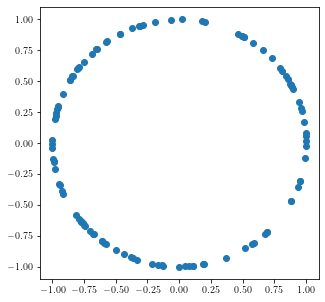

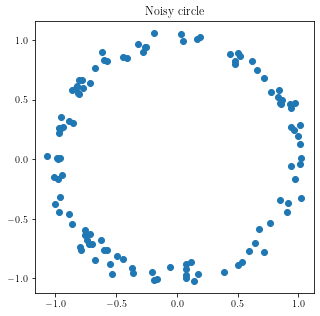

In [21]:
def circle_embedding(theta):
    return np.array([np.cos(theta),np.sin(theta)])

n= 110 #Number of points

pt_cloud = circle_embedding(2*np.pi*np.random.uniform(size =n))
plt.figure(figsize=(5,5)) 
plt.scatter(pt_cloud[0,:], pt_cloud[1,:])
plt.show()

#Then we add noise
eps = 0.05
noise = eps*np.random.randn(2,n)
noisy_cloud = pt_cloud + noise
plt.figure(figsize=(5,5)) 
plt.scatter(noisy_cloud[0,:], noisy_cloud[1,:])
plt.title("Noisy circle")
plt.show()

- Can you explain what the code in the previous cell did ? Make sure you've understood it.

We then plot the persistence diagram of the first point cloud, without noise. 

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

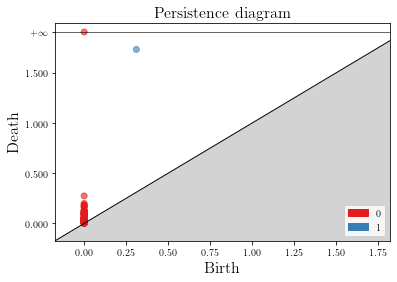

In [22]:

dist_mat = []
for i in range(n):
    ld = []
    for j in range(i):
        ld.append(np.linalg.norm(pt_cloud[:,i]-pt_cloud[:,j]))
    dist_mat.append(ld)
rips_complex2 = gd.RipsComplex(distance_matrix=dist_mat,max_edge_length=3.)
st = rips_complex2.create_simplex_tree(max_dimension=2)
diag = st.persistence(homology_coeff_field=2, min_persistence=0)
gd.plot_persistence_diagram(diag, legend = True)

Now, plot the persistence diagram of the noisy point cloud :

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

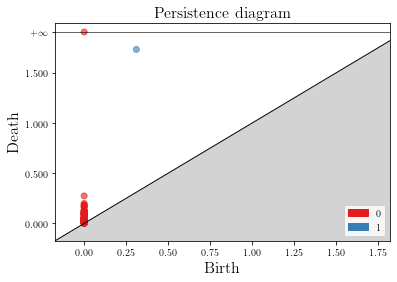

In [23]:
#Your turn !
#You need to build the simplicial complex using the distance matrix as done in the previous example.
noisy_diag = st.persistence(homology_coeff_field=2, min_persistence=0)
gd.plot_persistence_diagram(noisy_diag, legend = True)


Then, we compute the distances between the two diagrams.

Sadly, the GUDHI function to compute bottleneck distances only compares diagram of the same dimension. Using the following function, we compute the maximum of the bottleneck distances between the diagrams of the $i$-th homology.

In [37]:
def homology_bottleneck_distance(diag_a, diag_b):
    diag_a2 = [feature[1] for feature in diag_a if feature[0] ==2]
    diag_a1 = [feature[1] for feature in diag_a if feature[0] ==1]
    diag_a0 = [feature[1] for feature in diag_a if feature[0] ==0]
    diag_b2 = [feature[1] for feature in diag_b if feature[0] ==2]
    diag_b1 = [feature[1] for feature in diag_b if feature[0] ==1]
    diag_b0 = [feature[1] for feature in diag_b if feature[0] ==0]
    return max(gd.bottleneck_distance(diag_a1, diag_b1),gd.bottleneck_distance(diag_a0, diag_b0))


- Using this function, compute the distance between our two diagrams, namely *diag* and *noisy_diag*.  

In [38]:
#Your Turn !

This is an example of the **Stability Theorem**. Think about it ! Why ?

To see how the stability theorem fares, we can keep track of the distances between diagrams when the noise gets bigger.
The following function takes in input a point cloud and a number epsilon, 
and outputs the diagram given by the rips filtration of the point cloud + a gaussian noise with variance epsilon


In [58]:
def building_rips(pt_cloud, eps, display = False): 
    #pt_cloud is the original point cloud, eps is the variance of the gaussian noise we are about to add.
    a,b = pt_cloud.shape #to add the correct number of noisy points
    noisy_cloud = pt_cloud + eps*np.random.randn(a,b)
    if display:
        plt.scatter(noisy_cloud[0,:], noisy_cloud[1,:])
    dist_mat = []
    for i in range(n):
        ld = []
        for j in range(i):
            ld.append(np.linalg.norm(noisy_cloud[:,i]-noisy_cloud[:,j]))
        dist_mat.append(ld)
    rips_complex2 = gd.RipsComplex(distance_matrix=dist_mat,max_edge_length=3.)
    st = rips_complex2.create_simplex_tree(max_dimension=2)
    return st.persistence(homology_coeff_field=2, min_persistence=0)

Then, we see how the distance evolves when the signal to noise gets lower.

Epsilon = 0.01


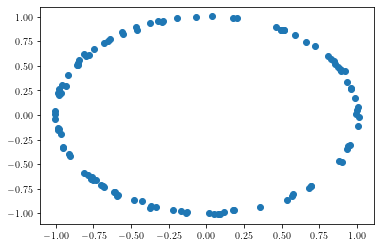

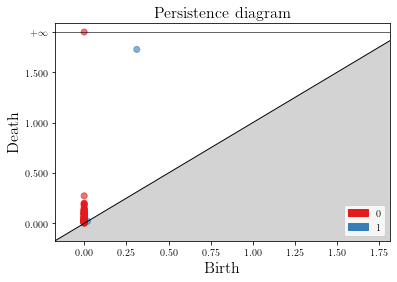

Epsilon = 0.1


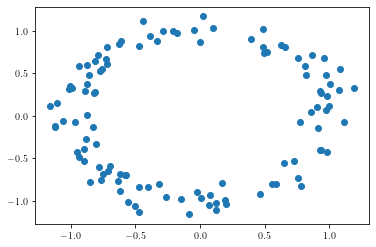

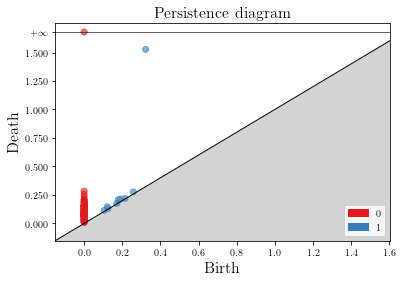

Epsilon = 0.5


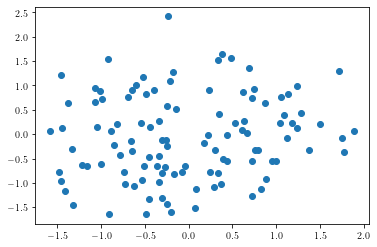

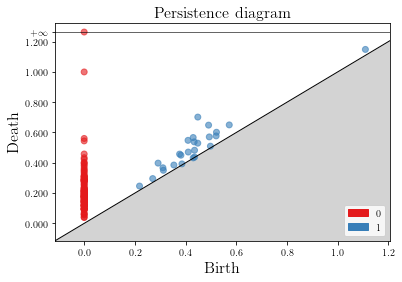

In [68]:
epsilon_list = [0.01, 0.02, 0.04, 0.06,0.08, 0.1,0.12, 0.14, 0.16, 0.18, 0.2, 0.3, 0.4, 0.5]
distance_list = []
diag = np.array(diag)
for eps in epsilon_list:
    display = False
    diag_eps = building_rips(pt_cloud,eps, display = eps in [0.01, 0.1, 0.5])
    if eps in [0.01,0.1, 0.5]:
        gd.plot_persistence_diagram(diag_eps, legend = True)
        print("Epsilon =", eps)
        plt.show()
        plt.close()
    dist = homology_bottleneck_distance(diag, diag_eps)
    distance_list.append(dist)


We then display how the distance evolves with epsilon.

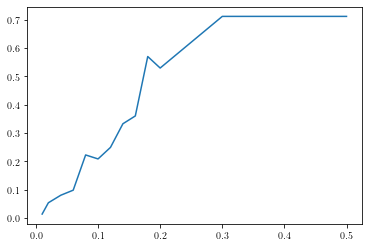

In [69]:
plt.plot(epsilon_list,distance_list)
plt.show()

- Interpret the previous plot. How does that illustrate the *Stability Theorem* ?

- Since our persistence diagram is obtained with the addition of a random noise, how could we make this more statistically sound ?


## 2) Building Alpha-Complex filtrations with Gudhi.

In this section we will simply learn how to build Alpha-Complexes filtrations using GUDHI.

You can find the documention here https://gudhi.inria.fr/python/latest/alpha_complex_user.html and then teach yourself how to use it.

- Compute and then display the persistence diagram of the alpha-complex filtration of our original pt_cloud.

In [70]:
#Your turn ! 

- Now, redo exercize 1) using alpha-complexes instead of rips. 

In [ ]:
#Your turn !

- What does it change ?

## 3) Betti Curves

- Write a function which take a persistence diagram as an input and outputs the function 
$x \mapsto \beta_i(x)$ the $i$th betti number at the filtration value $x$. Keep in mind the structure of a persistence diagram in GUDHI : a list containing the dimension of the feature and a coupe (birth, death).

In [72]:
def betti(diagram, i):
    def f(x):
        betti_i = #Your turn !
        return betti_i
    return f

SyntaxError: invalid syntax (2129274403.py, line 4)

- Then test your algorithm on the previous diagrams we built by plotting the difference between two betti curves.

To plot the (discretized) graph a function, use the plt.plot function : 
plt.plot(list1, list2) plots the points in R^2 (list1[0], list2[0]), (list1[1], list2[1]),...) 
 with line connecting consecutive points.

In [74]:
#Your Turn !